<a href="https://colab.research.google.com/github/Yohk2291/MachineLearning/blob/master/CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KerasでCNNを実装


ライブラリのインポート

In [0]:
# numpy
import numpy as np

# kerasから必要なライブラリをimport
from keras import utils
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.datasets import cifar10
from keras.utils import plot_model



# 描画に使うライブラリ
import matplotlib.pyplot as plt

Cifer10のロードと可視化

In [0]:
# データのロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
# ラベルとクラス数の定義
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])
n_classes = 10

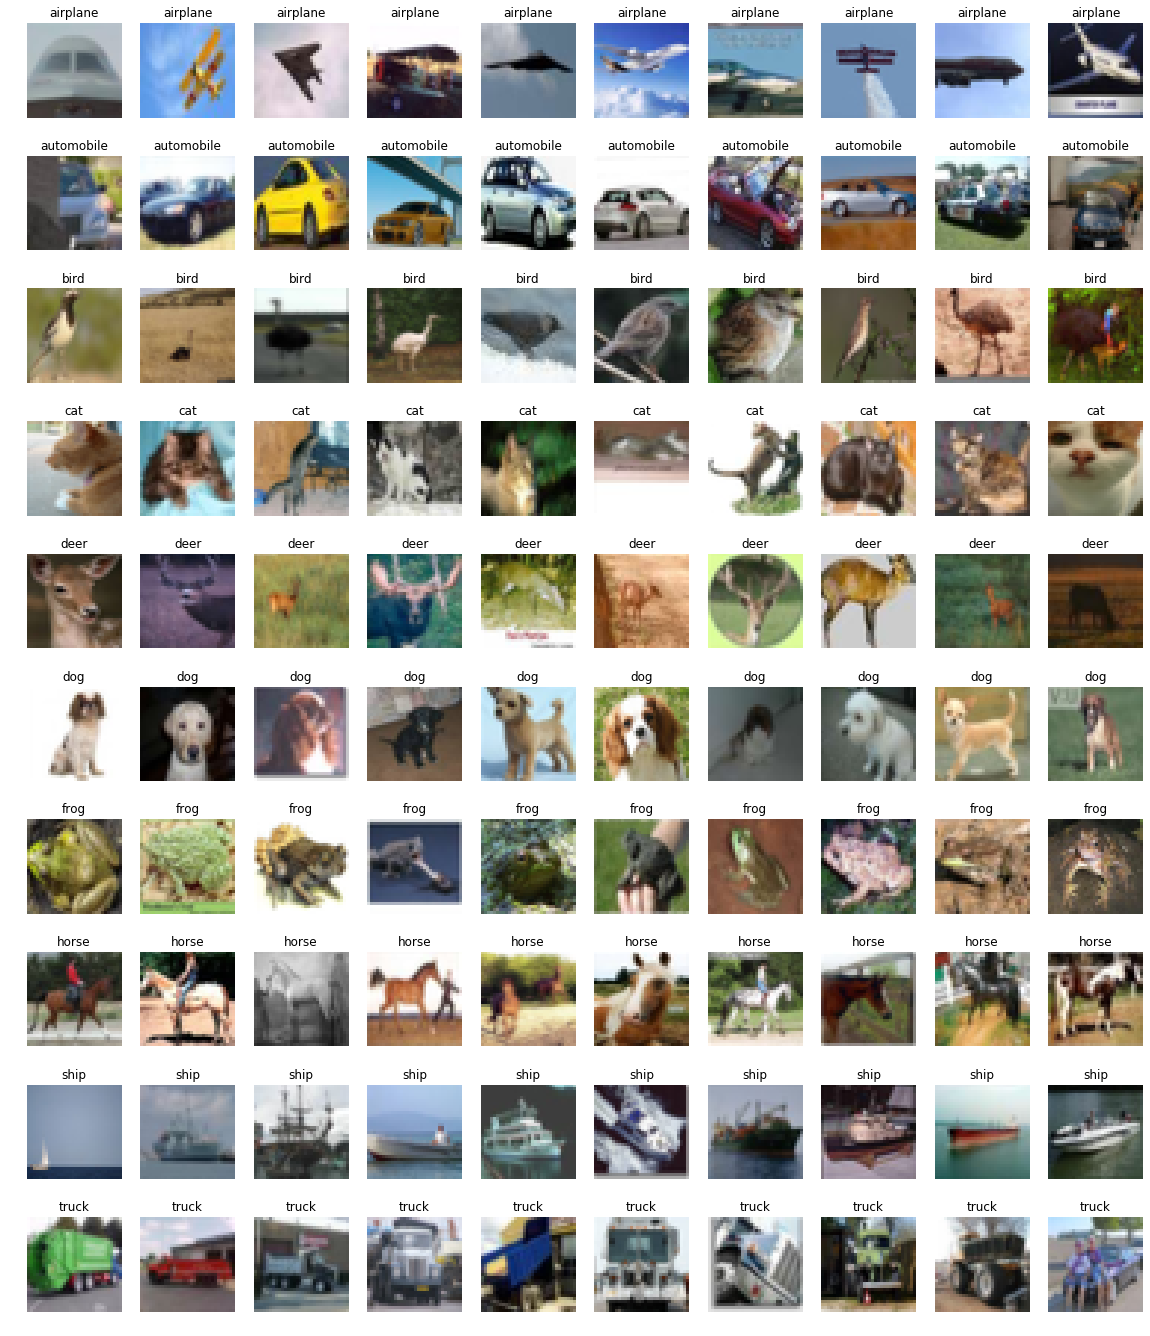

In [0]:
pos = 1
plt.figure(figsize=(20,24))

# 各クラスごとにプロット
for targetClass in range(n_classes):
    targetIdx = []
    # クラスclassIDの画像のインデックスリストを取得
    for i in range(len(y_train)):
        if y_train[i][0] == targetClass:
            targetIdx.append(i)

    # 各クラスからランダムに選んだ最初の10個の画像を描画
    np.random.shuffle(targetIdx)
    for idx in targetIdx[:10]:
        plt.subplot(10, 10, pos)
        plt.imshow(X_train[idx])
        plt.axis('off')
        plt.title(cifar10_labels[y_train[idx][0]])
        pos += 1
plt.show()

In [0]:
# 入力画像の前処理（正規化）
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 出力ラベルの前処理（カテゴリカル変数化）
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

## CNNの実装(1) ベースモデル

In [0]:
# CNNモデルの定義
model = Sequential()

model.add(Conv2D(64, (3,3),   # チャンネル数を増やす 10->64
                 padding='same',
                 input_shape=(32, 32, 3), activation='relu')) 

model.add(Conv2D(64, (3,3), padding='same', activation='relu')) # 1つめのConvと同様

model.add(BatchNormalization()) # Batch Normalizationを使う
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(128, (3,3), padding='same', activation='relu')) 
model.add(Conv2D(128, (3,3), padding='same', activation='relu')) 

model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model.add(Conv2D(256, (3,3), padding='same', activation='relu')) 

model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 16, 16, 128)     

In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# 学習パラメータの定義
batch_size = 50
nb_epochs = 25
validation_split = 0.1

# 学習
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs,
                    validation_split=validation_split,
                    verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 44s 979us/step - loss: 1.6917 - acc: 0.3875 - val_loss: 1.5053 - val_acc: 0.4532
Epoch 2/25
45000/45000 [==============================] - 41s 918us/step - loss: 1.1944 - acc: 0.5658 - val_loss: 1.2753 - val_acc: 0.5418
Epoch 3/25
45000/45000 [==============================] - 41s 916us/step - loss: 0.9761 - acc: 0.6536 - val_loss: 0.9559 - val_acc: 0.6758
Epoch 4/25
45000/45000 [==============================] - 41s 916us/step - loss: 0.8469 - acc: 0.6995 - val_loss: 0.7915 - val_acc: 0.7308
Epoch 5/25
45000/45000 [==============================] - 41s 915us/step - loss: 0.7753 - acc: 0.7269 - val_loss: 0.7466 - val_acc: 0.7438
Epoch 6/25
45000/45000 [==============================] - 41s 916us/step - loss: 0.7080 - acc: 0.7520 - val_loss: 0.6143 - val_acc: 0.7884
Epoch 7/25
45000/45000 [==============================] - 41s 917us/step - loss: 0.6604 - acc: 0.7700 - val_loss: 0.6

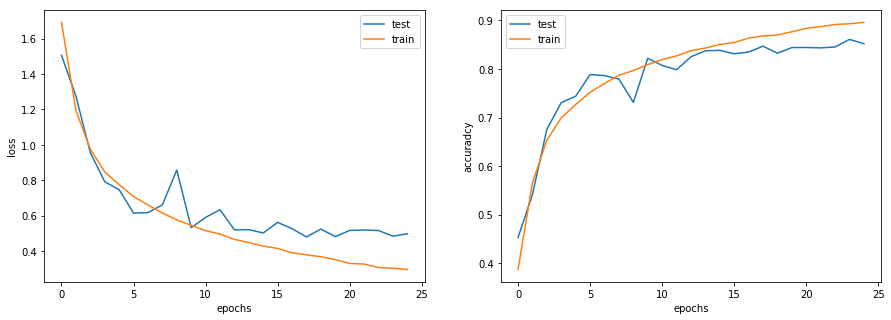

In [0]:
# 各epochののコストと精度をプロット
fig = plt.figure(figsize=(15,5))

# コストのプロット
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# 精度のプロット
plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuradcy')

plt.show()

## CNNの実装(2) 層を増やす

In [0]:
# CNNモデルの定義
model2 = Sequential()

model2.add(Conv2D(64, (3,3),   # チャンネル数を増やす 10->64
                 padding='same',
                 input_shape=(32, 32, 3), activation='relu')) 

model2.add(Conv2D(64, (3,3), padding='same', activation='relu')) # 1つめのConvと同様

model2.add(BatchNormalization()) # Batch Normalizationを使う
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


model2.add(Conv2D(128, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(128, (3,3), padding='same', activation='relu')) 

model2.add(BatchNormalization()) 
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


model2.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(256, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(256, (3,3), padding='same', activation='relu')) 

model2.add(BatchNormalization()) 
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


model2.add(Conv2D(512, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(512, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(512, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(512, (3,3), padding='same', activation='relu')) 

model2.add(BatchNormalization()) 
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


model2.add(Conv2D(512, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(512, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(512, (3,3), padding='same', activation='relu')) 
model2.add(Conv2D(512, (3,3), padding='same', activation='relu')) 

model2.add(BatchNormalization()) 
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


model2.add(Flatten())

model2.add(Dense(100, activation='relu'))
model2.add(Dense(n_classes, activation='softmax'))


model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 16, 16, 128)     

In [0]:
model2.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# 学習パラメータの定義
batch_size = 50
nb_epochs = 20
validation_split = 0.1

# 学習
history = model2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs,
                    validation_split=validation_split,
                    verbose=1)

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 115s 3ms/step - loss: 1.9898 - acc: 0.2048 - val_loss: 2.1597 - val_acc: 0.2358
Epoch 2/20
45000/45000 [==============================] - 112s 2ms/step - loss: 1.6755 - acc: 0.3377 - val_loss: 1.4809 - val_acc: 0.4178
Epoch 3/20
45000/45000 [==============================] - 112s 2ms/step - loss: 1.4499 - acc: 0.4435 - val_loss: 1.3875 - val_acc: 0.4672
Epoch 4/20
45000/45000 [==============================] - 112s 2ms/step - loss: 1.3205 - acc: 0.5105 - val_loss: 1.3832 - val_acc: 0.4926
Epoch 5/20
45000/45000 [==============================] - 112s 2ms/step - loss: 1.1925 - acc: 0.5777 - val_loss: 1.0781 - val_acc: 0.6272
Epoch 6/20
45000/45000 [==============================] - 112s 2ms/step - loss: 1.0849 - acc: 0.6237 - val_loss: 1.0458 - val_acc: 0.6472
Epoch 7/20
45000/45000 [==============================] - 112s 2ms/step - loss: 1.0189 - acc: 0.6506 - val_loss: 0.9642 - v

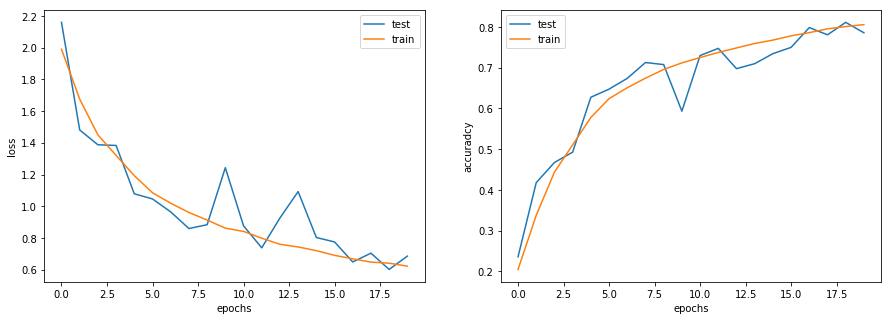

In [0]:
# 各epochののコストと精度をプロット
fig = plt.figure(figsize=(15,5))

# コストのプロット
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='test')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# 精度のプロット
plt.subplot(1,2,2)
plt.plot(history.history['val_acc'], label='test')
plt.plot(history.history['acc'], label='train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuradcy')

plt.show()